In [66]:
import numpy as np
import matplotlib.pyplot as plt

numpy.concatenate()
- Công dụng: Dùng để nối các mảng lại với nhau theo một trục (axis) xác định.

numpy.c_[]
- Công dụng: chủ yếu được dùng để thêm cột vào một mảng 2D hoặc chuyển một mảng 1D thành dạng 2D bằng cách nối theo chiều dọc (axis 1).

### Câu 7: Polynomial feature cho hàm đơn biến

In [67]:
def create_polynomial_features(x, degree=2):
    """ 
    Creates the polynomial features
    Args:
        x: A array tensor for the data.
        degree: An integer for the degree of the generated polynomial function.
    """
    
    x_new = x
    for d in range(2, degree +1):
        # Nối các mảng 2D theo chiều dọc (như concatenate với axis=1)
        x_new = np.c_[x_new, np.power(x, d)]
    return x_new

x = np.array([[1], 
              [2], 
              [3]])
print(create_polynomial_features(x, 2))

[[1 1]
 [2 4]
 [3 9]]


### Câu 8 : polynomial feature đa biến

#### Cách cá nhân

In [68]:
def create_polynomial_features(x:np.ndarray, degree=2):
    """ 
    Creates the polynomial features
    Args:
        x: A array tensor for the data.
        degree: An integer for the degree of the generated polynomial function.
    """

    x_new = x
    for d in range(2, degree + 1):
        for i_feat in range(x.shape[1] - 1):
            # Nối các mảng 2D theo chiều dọc (như concatenate với axis=1)
            x_new = np.insert(x_new, i_feat + 1, np.power(x[:, i_feat], d), axis=1)
        
        x_new = np.c_[x_new, np.power(x[:, -1], d)]
    return x_new


x = np.array([[1, 2],
              [2, 3],
              [3, 4]])
print(create_polynomial_features(x, 2))

[[ 1  1  2  4]
 [ 2  4  3  9]
 [ 3  9  4 16]]


In [69]:
x = np.array([[1, 2],
              [2, 3],
              [3, 4]])
x_new = x 
x_new = np.insert(x, 1, np.power(x[:, 0], 2), axis=1)
print(x_new)

[[1 1 2]
 [2 4 3]
 [3 9 4]]


#### Cách theo đề

In [70]:
def create_polynomial_features(x, degree=2):
    """Creates the polynomial features.
    
    Args:
        x: A numpy array for the data.
        degree: An integer for the degree of the generated polynomial function.
    """
    x_mem = []
    for x_sub in x.T:
        x_sub = x_sub.T
        x_new = x_sub
        for d in range(2, degree + 1):
            x_new = np.c_[x_new, np.power(x_sub, d)]
        x_mem.extend(x_new.T)
    print(x_mem)
    return np.c_[x_mem].T


x = np.array([[1, 2],
              [2, 3],
              [3, 4]])

print(create_polynomial_features(x, 2))

[array([1, 2, 3]), array([1, 4, 9]), array([2, 3, 4]), array([ 4,  9, 16])]
[[ 1  1  2  4]
 [ 2  4  3  9]
 [ 3  9  4 16]]


### Using sklearn

In [71]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [72]:
sales_data = pd.read_csv('./data/SalesPrediction.csv')
sales_data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [73]:
# Lấy danh sách các biến phân loại (categorical)
categorical_columns = sales_data.select_dtypes(
    include=['object', 'category']).columns.tolist()

# Lấy danh sách các biến liên tục (numerical)
numerical_columns = sales_data.select_dtypes(
    include=['number']).columns.tolist()

In [74]:
sales_data = pd.get_dummies(sales_data)
sales_data

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,False,False,True,False
4568,71.0,20.610685,6.545573,249.101915,False,False,False,True
4569,44.0,19.800072,5.096192,163.631457,False,False,True,False
4570,71.0,17.534640,1.940873,253.610411,True,False,False,False


In [75]:
# Điền giá trị thiếu bằng mean của từng cột
sales_data[numerical_columns] = sales_data[numerical_columns].fillna(
    sales_data[numerical_columns].mean())

In [76]:
sales_data.isnull().sum()

TV                  0
Radio               0
Social Media        0
Sales               0
Influencer_Macro    0
Influencer_Mega     0
Influencer_Micro    0
Influencer_Nano     0
dtype: int64

In [77]:
x = sales_data[['TV', 'Radio', 'Social Media', 'Influencer_Macro',
                'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']]
y = sales_data['Sales']

X_train, X_test, y_train, y_test = train_test_split(

    x, y, test_size=0.33, random_state=0)

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
numerical_col_x = X_train.select_dtypes(include=['number']).columns.tolist()


poly_model = LinearRegression()

scaler = StandardScaler()
X_train[numerical_col_x] = scaler.fit_transform(X_train[numerical_col_x])
X_test[numerical_col_x] = scaler.transform(X_test[numerical_col_x])

In [79]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [80]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [81]:
preds = poly_model.predict(X_test_poly)
r2_score(y_test, preds)

0.9951771750974792

In [82]:
df = pd.DataFrame(X_test, columns=['TV', 'Radio', 'Social Media', 'Influencer_Macro',
                                   'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'])
df['Sales'] = preds

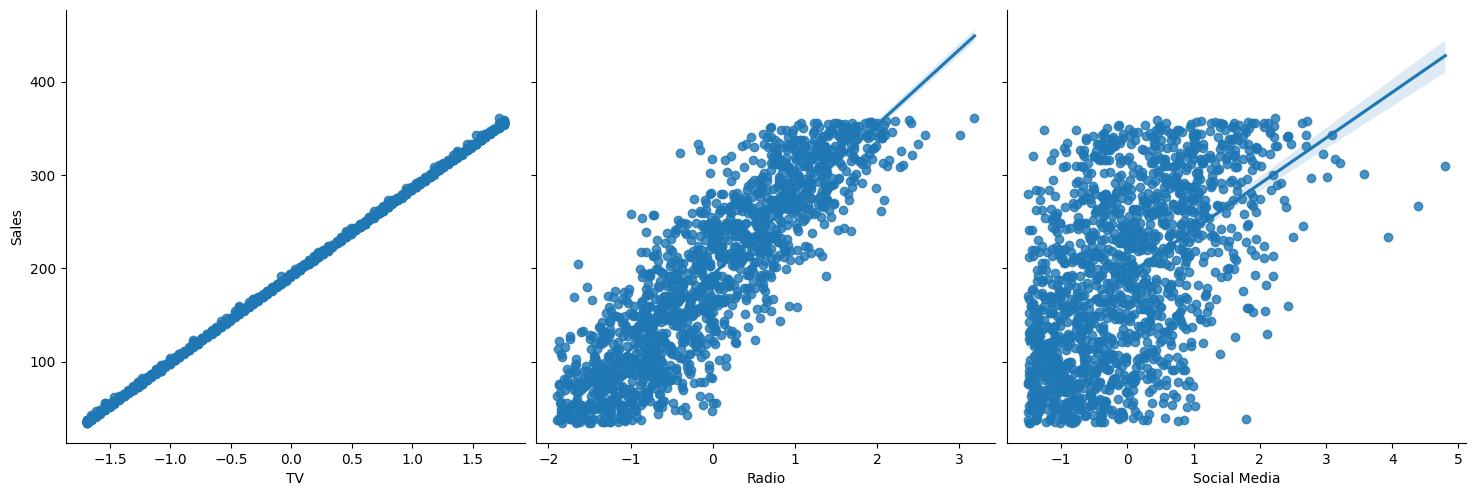

In [83]:
sns.pairplot(data=df,
             x_vars=['TV', 'Radio', 'Social Media'],
             y_vars='Sales',
             height=5,
             kind='reg'
             )
plt.show()